# <p style='text-align: center;'> Warming Arctic and associated changes in DMS emission. </p>

## <p style='text-align: center;'> By Rahul Ranjan (Assistant: Ada Gjermundsen) </p>

## Abstract

<p style='text-align: justify;'> The Arctic sea ice extent is shrinking due to global warming. The reduction in sea ice thickness as well as cover has led to enhanced solar insolation at the sea surface which promotes increased net primary production (NPP). Being linked to NPP, Dimethyl Sulphide emission is also increasing. But the changes are not evenly distributed. Some regions are changing more than the others. In this study, we have tried to understand the linkage between the warming Arctic and DMS emissions in the different regions using NorESM simulation data. We see that Barent, Greenland and Chuchuki seas are warming more rapidly, therefore NPP and DMS production have also increased more over these regions but there is a decrease in Autumn despite positive trend in SST and sea ice retreat. Central arctic is also producing more DMS, surprisingly also during Autumn. However, in each part of the Arctic, the anomaly in DMS production has two modes, one during early spring and other in autumn. </p>

# Table of Content
### 1. Introduction
### 2. Data
### 3. Methods
#####   3.1 Import packages
#####   3.2 Calculation of the yearly trend for the Arctic region
#####   3.3 Anomaly for different seasons
#####   3.4 Calculation of trends
### 4. Results and discussion
#####  4.1 Yeraly Trends
#####  4.2 Anomalies in different seasons
#####  4.3 Trends in different seasons
#####  4.4 Monthly anomaly in different basins of the Arctic
### 5. Conclusion
### References

## 1. Introduction

<p style='text-align: justify;'> The oceans play a significant role in global carbon budgets via photosynthesis. Approximately half of all global net annual photosynthesis occurs in the oceans, with ~10-15% of production occurring on the continental shelves alone (Müller-Karger et al. 2005). Phytoplankton are one of the major contributors to the primary production in the oceans and form the base of the entire food web. Primary productivity is strongly dependent upon light availability and the presence of nutrients, and thus vary significantly from one region to other. Over the tropical region, where amount of sunlight is fairly constant throughout the year, phytoplankton concentration doesn’t vary much, while in the Arctic, it varies a lot from season to season due to high variability in the sunshine hours. Overall, the net primary production (NPP) is too low in the Arctic as compared to that in the tropics. But due to warming climate, the Arctic is changing and is warming nearly 4 times faster than the globe (Isaksen, K., et al. 2022, Rantanen et al. 2022). Sea ice has already started responding to this and shown a steady decline over the past decade. Reduction in the sea ice cover or even thinning can lead to increased amount and duration of solar insolation at the ocean surface. Hence, more solar insolation due to sea ice loss in the Arctic Ocean promotes increased growing season and production of phytoplankton. This has more implications than just having an impact on the carbon budget. Phytoplankton productivity is also closely linked to DMS production in the ocean. Enzymatic decomposition of dimethylsulfonium propionate (DMSP) is the primary source of DMS in seawater with DMSP being released from phytoplankton by a variety of mechanisms. DMS is the most abundant form in which the ocean releases gaseous sulfur. Later on, in the atmosphere, DMS is oxidized to sulfate particles that alter the amount of solar radiation reaching the Earth’s surface both by directly scattering solar energy and indirectly by acting as cloud condensation nuclei (CCN), thereby affecting the cloud albedo. In this project, we aim to understand the linkage between changing sea ice cover and DMS production in the Arctic using the historical simulation of Norwegian Earth system model. </p>

## 2. Data

We have used historical simulations of the second version of the fully coupled Norwegian Earth System Model (NorESM2, specifically NorESM2-LM with 2 degree resolution for land and atmosphere and 1 degree for the ocean) which is based on the second version of the Community Earth System Model (CESM2). The period that we focus on is 1950 to 2014 to understand changes with respect to climatology.

   Variables investigated: 
a) SST ('tos'), 
b) sea ice cover ('siconc'), 
c) Surface DMS in sea water ('dmsos'), 
d) chlorophyll (chlos'')

## 3.Methods

### 3.1 Import pakages

In [11]:
import modules as md 
import xarray as xr
import cftime
import numpy as np
import s3fs
import warnings
import intake
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%load_ext autoreload
%autoreload 2
warnings.simplefilter('ignore')
xr.set_options(display_style='html')
%matplotlib inline 
model= 'NorESM2-LM'  #name of the model, other option that can be put are  CNRM-ESM2-1, CESM2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 3.2 Calculation of yearly trends for the Arctic region

Here yearly trends of various parameters have been calculated. The parameters are chlorophyll mass concentration, which is a proxy for the phytoplankton productivity in the ocean, Sea surface temperature (SST), Dimethylsulphide (DMS) in sea water and sea ice areal coverage.


In [5]:
#.................Chlorophyll..................#
model= 'NorESM2-LM'
var='chlos'
chlos=md.regional_average(model,var)  

y=chlos.to_numpy()
x=chlos.year
xx=x.to_numpy()
chlos=[xx,y]

np.savetxt('Data/timeseries/chlos.txt',np.array(chlos))

#...................SST...........................#
var='tos'
tos=md.regional_average(model,var)

y=tos.to_numpy()
x=tos.year
xx=x.to_numpy()
tos=[xx,y]

np.savetxt('Data/timeseries/tos.txt',np.array(tos))

#.....................DMS...........................#
model= 'NorESM2-LM'
var='dmsos'
dmsos=md.regional_average(model,var)

y=dmsos.to_numpy()
x=dmsos.year
xx=x.to_numpy()

dmsos=[xx,y]
np.savetxt('Data/timeseries/dmsos.txt',np.array(dmsos))

#.......................Sea Ice............................#
model= 'NorESM2-LM'  
var='siconc'
siconc=md.regional_average(model,var)

y=siconc.to_numpy()
x=siconc.year
xx=x.to_numpy()

siconc=[xx,y]
np.savetxt('Data/timeseries/siconc.txt',np.array(siconc))


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


### 3.3 Anomaly for different seasons

Anomalies of different parameters have been calculated for each of the seasons except winter. The reference years are 1950 to 1979. To calculate the anomaly, average of particular parameter between 1980 to 2014 at a particular location is taken and then the climatology is subtracted from it.  
An example of the calculation is as follows:

In [3]:
"Anomaly in chlorophyll mass concentration"
ds_now=md.anomaly_seasonal(model,'chlos')[0] #calculates the average for the years 1980-2014
ds_ref=md.anomaly_seasonal(model,'chlos')[1] #calculates the climatology
anm=ds_now-ds_ref  #calculation of anomaly

### 3.4 Calculation of trends

In [4]:
ds_ls=md.seasonal_avg_timeseries(model,'chlos') #trend calculation for chlorophyll for different seasons


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


## 4. Results and Discussion

### 4.1 Yearly Trends

<p style='text-align: justify;'> Here, the yearly average of the whole Arctic region (above 60 degree north) have been presented. After around 1995, there is a clear increase in SST and decrease in sea ice cover. As net primary production (NPP) is closely linked to the amount of insolation, sea ice reduction has resulted in the enhanced growth of the phytoplanktons. The DMS in the ocean comes from the bacterial decomposition of DMSP released by phytoplanktons. Therefore, DMS is also depicting a rising trend. However, it is not as straightforward as it seems. DMS production can also be affected by factors like salinity and amount of nutrients in the ocean, which can vary over different parts of the arctic region. To have a clearer picture, the anomaly in chlorophyll concentration and DMS have been investigated in the next sections. </p>

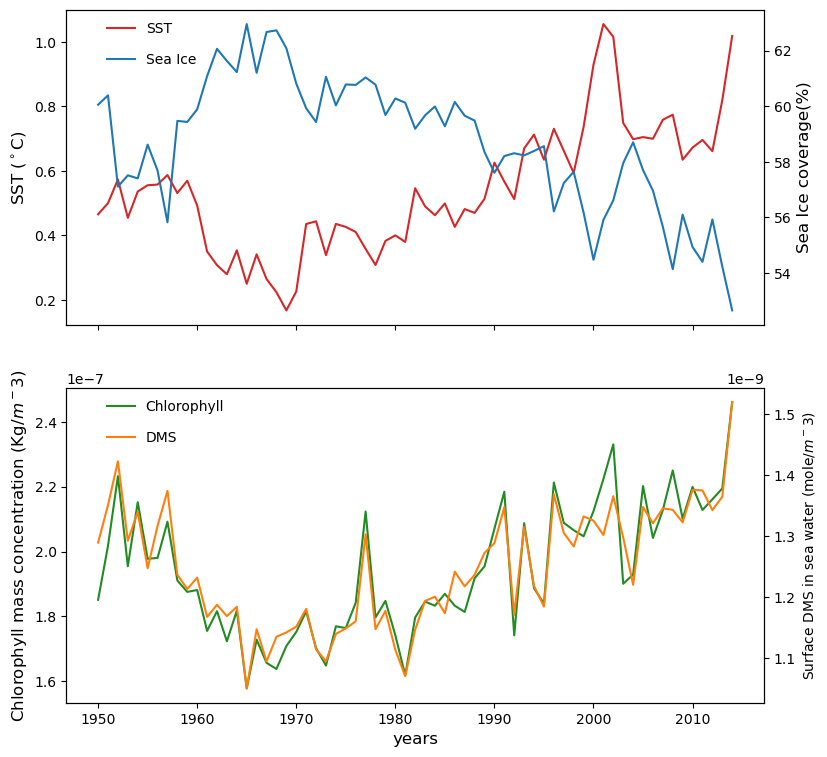

In [24]:
##.............................plot trends for the last 'n' years.............................##

n=65
chlos= np.loadtxt('Data/timeseries/chlos.txt')
dmsos= np.loadtxt('Data/timeseries/dmsos.txt')
siconc= np.loadtxt('Data/timeseries/siconc.txt')
tos= np.loadtxt('Data/timeseries/tos.txt')

fig,(ax1,ax2)=plt.subplots(2,sharex=True, figsize=(9, 9))

ax1.plot(tos[0][-n:],tos[1][-n:],label='SST',color='tab:red')
ax11=ax1.twinx()
ax11.plot(siconc[0][-n:],siconc[1][-n:],label='Sea Ice',color='tab:blue')
ax1.set_ylabel('SST ($^\circ$C)',fontsize=12)
ax11.set_ylabel('Sea Ice coverage(%)',fontsize=12)



ax2.plot(chlos[0][-n:],chlos[1][-n:],label='Chlorophyll',color='forestgreen')
ax22=ax2.twinx()
ax22.plot(dmsos[0][-n:],dmsos[1][-n:],label='DMS',color='tab:orange')
ax2.set_ylabel('Chlorophyll mass concentration (Kg/$m^-3$)',fontsize=12)
ax22.set_ylabel('Surface DMS in sea water (mole/$m^-3$)')
ax2.set_xlabel('years',fontsize=12)

ax1.legend(loc=(0.05,0.9),frameon=False)
ax11.legend(loc=(0.05,0.8),frameon=False)
ax2.legend(loc=(0.05,0.9),frameon=False)
ax22.legend(loc=(0.05,0.8),frameon=False)

###### Figure 1. Yearly trends of SST, sea ice, Chlorophyll concentration and DMS in the sea water averaged over the Arctic Region. 

## 4.2 Anomalies in different seasons

### 4.2.1. SST and Sea Ice

In [8]:
##............................SST..........................##
dsst_now=md.anomaly_seasonal(model,'tos')[0]
dsst_ref=md.anomaly_seasonal(model,'tos')[1]

In [9]:
##.....................Sea Ice coverage......................##
ds_ice_now=md.anomaly_seasonal(model,'siconc')[0]
ds_ice_ref=md.anomaly_seasonal(model,'siconc')[1]

In [10]:
##.....................Anomaly calculation......................##
anm_sst=dsst_now-dsst_ref #SST
anm_ice=ds_ice_now-ds_ice_ref #Sea Ice

Text(0.48, 0.71, 'SST change')

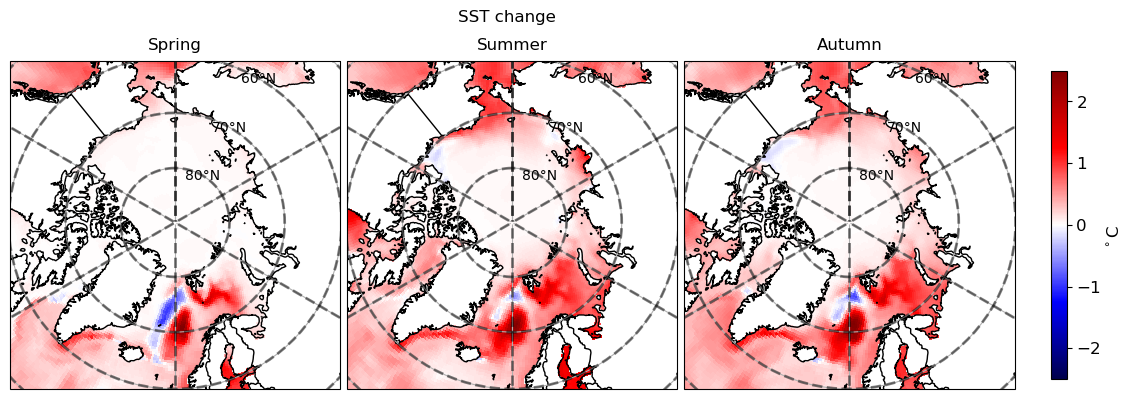

In [20]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=anm_sst.tos.sel(season=seasons[i]).plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('$^\circ$C',horizontalalignment='right',fontsize=12)
fig.suptitle('SST change',y=0.71,x=0.48)
#plt.savefig('plots/anomaly/SST.png',dpi=500)

##### Figure 2. Change in the sea surface temperature between year 1980 to 2014, taking 1950 to 1979 as reference.


Text(0.5, 0.71, 'change in sea ice area')

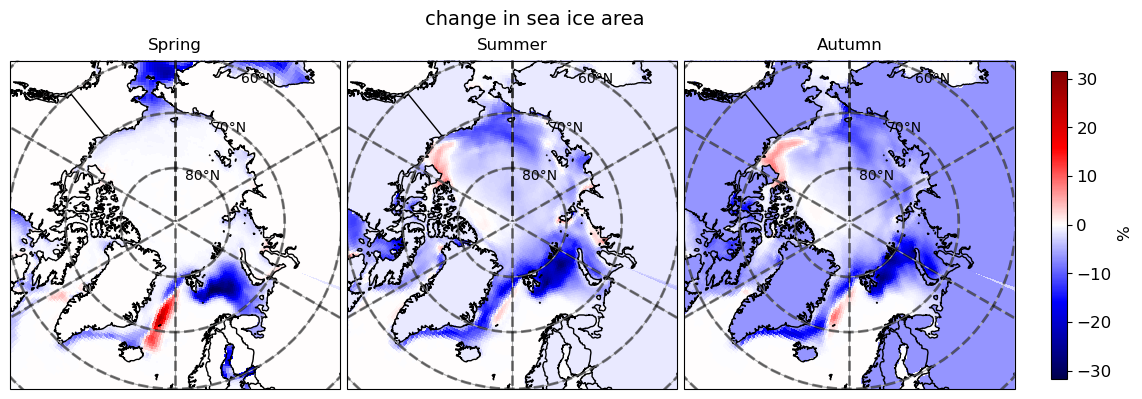

In [13]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=anm_ice.siconc.sel(season=seasons[i]).plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    #axs.flat[i].stock_img()
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('%',horizontalalignment='right',fontsize=12)
fig.suptitle('change in sea ice area',y=0.71,fontsize=14)
#plt.savefig('plots/anomaly/sea_ice.png',dpi=500)

##### Figure 3. Percentage change in the sea ice area between year 1980 to 2014, taking 1950 to 1979 as reference.

<p style='text-align: justify;'> The warming sea has influenced sea ice significantly over the Barent sea region which has now lost 10-20% of the sea ice. There is a rise in the sea ice cover over the cooling spot between the Norwegin sea and the Greenland sea, which is more pronounced in the spring. Greenland sea has lost more ice during the summer and Autumn while almost no change in the spring. The effect of global warming has reached upto the central arctic too, but bigger differnces in sea ice and SST are observed mostly in the lower latitude. </p>

### 4.2.2. chlorophyll and DMS

In [14]:
##............................Chlorophyll..........................##
ds_chlos_now=md.anomaly_seasonal(model,'chlos')[0]
ds_chlos_ref=md.anomaly_seasonal(model,'chlos')[1]
anm_chlos=ds_chlos_now-ds_chlos_ref  #anomaly chlorophyll

In [16]:
##............................DMS..........................##
ds_DMS_now=md.anomaly_seasonal(model,'dmsos')[0]
ds_DMS_ref=md.anomaly_seasonal(model,'dmsos')[1]
anm_DMS=ds_DMS_now-ds_DMS_ref #anomaly DMS

Text(0.5, 0.71, 'Chlorophyll mass concentration')

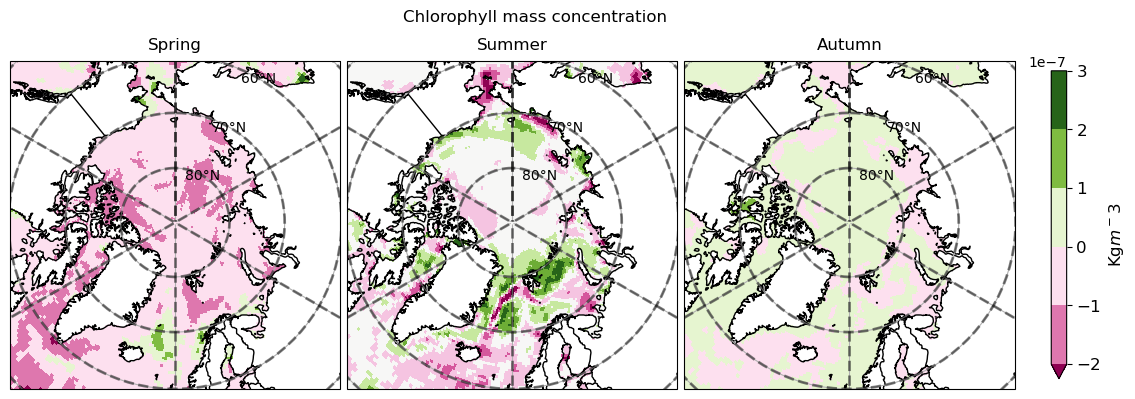

In [33]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=anm_chlos.chlos.sel(season=seasons[i]).plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='PiYG',
                                                   levels = np.linspace(-2e-7,3e-7,6),add_colorbar=False)
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    #axs.flat[i].stock_img()
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


#ticks=np.arange(-2e-7,+3.5e-7,1e-7)
# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs,shrink=0.4, location='right',pad=0.03)
#cbar.ax.locator_params(nbins=5)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('Kg$m^-3$',horizontalalignment='right',fontsize=12,y=0.55)
fig.suptitle('Chlorophyll mass concentration',y=0.71)

#plt.savefig('plots/anomaly/chlos.png',dpi=500)

##### Figure 4. Change in the chlorophyll production between year 1980 to 2014, taking 1950 to 1979 as reference.

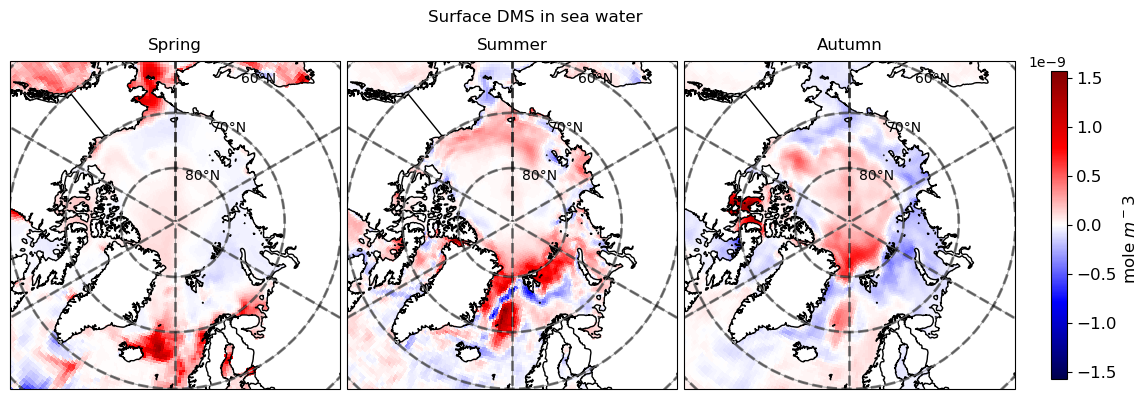

In [34]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=anm_DMS.dmsos.sel(season=seasons[i]).plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    #axs.flat[i].stock_img()
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False

# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('mole $m^-3$',horizontalalignment='right',fontsize=12,y=0.6)
fig.suptitle('Surface DMS in sea water',y=0.71)

plt.savefig('plots/anomaly/DMS.png',dpi=500)
#levels = np.linspace(-2e-7,3e-7,6)

##### Figure 5. Change in the sea ice area between year 1980 to 2014, taking 1950 to 1979 as reference.

<p style='text-align: justify;'> Chlorophyll and DMS have increased in the Barent, Greenlad and Chuchuki sea.
Barent sea has warmed more and also more primary prodection is happening there. Despite it, DMS anomaly is almost the same as in the greenland sea. This indicates that DMS has a connection to some other factors also. 
Importantly, there is decrese in chlorophyll and DMS production in the regions where they have increased in the summer (except the Norwegian sea).  </p>

## 4.3. Trends different seasons

### 4.3.1 Chlorophyll and DMS

In [ ]:
##....................Chlorophyll....................##
ds_ls=md.seasonal_avg_timeseries(model,'chlos')

ds_spring=md.slice_assign(ds_ls[1])
ds_summer=md.slice_assign(ds_ls[2])
ds_autumn=md.slice_assign(ds_ls[3])

ds_chlos=[ds_spring,ds_summer,ds_autumn]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [22]:
##..................DMS.............................##
dms_ls=md.seasonal_avg_timeseries(model,'dmsos')

dms_spring=md.slice_assign(dms_ls[1])
dms_summer=md.slice_assign(dms_ls[2])
dms_autumn=md.slice_assign(dms_ls[3])

dms=[dms_spring,dms_summer,dms_autumn]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Text(0.48, 0.71, 'Chlorophyll')

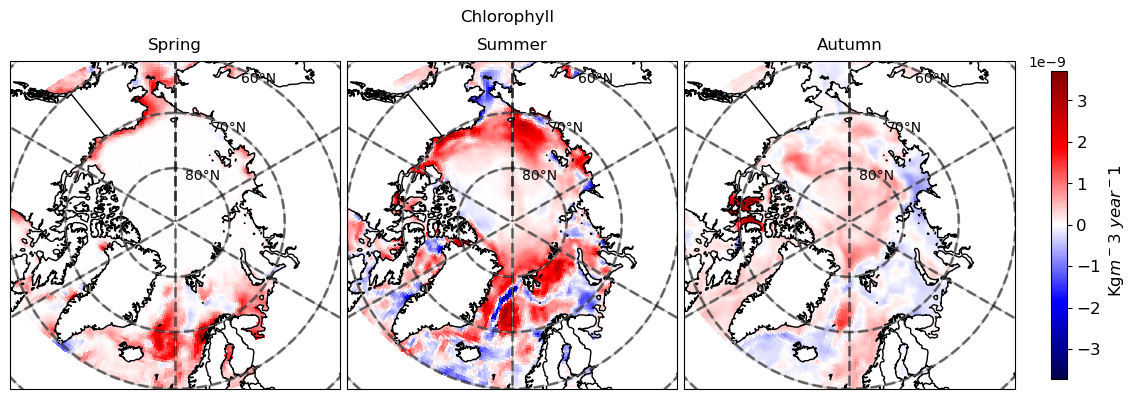

In [121]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']

for i in range (len(axs.flat)):
    cs=ds[i].chlos_polyfit_coefficients[0].plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('Kg$m^-3$ $year^-1$',horizontalalignment='right',fontsize=12,y=0.7)
fig.suptitle('Chlorophyll',y=0.71,x=0.48)

plt.savefig('plots/Trend/SST.png',dpi=500)

##### Figure 6. Trends in chlorophyll concentration for different seasons

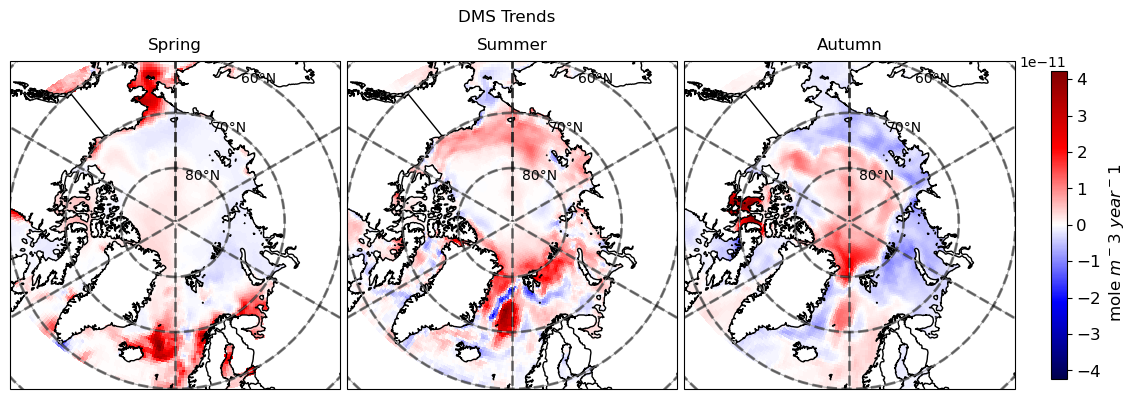

In [145]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']

for i in range (len(axs.flat)):
    cs=dms[i].dmsos_polyfit_coefficients[0].plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('mole $m^-3$ $year^-1$',horizontalalignment='right',fontsize=12,y=0.7)
fig.suptitle('DMS Trends',y=0.71,x=0.48)

plt.savefig('plots/Trend/DMS.png',dpi=500)

##### Figure 7. Trends in DMS concentration in sea water for different seasons

In [23]:
dsst_ls=md.seasonal_avg_timeseries(model,'tos')

dsst_spring=md.slice_assign(dsst_ls[1])
dsst_summer=md.slice_assign(dsst_ls[2])
dsst_autumn=md.slice_assign(dsst_ls[3])

dsst=[dsst_spring,dsst_summer,dsst_autumn]


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [28]:
dice_ls=md.seasonal_avg_timeseries(model,'siconc')
dice_spring=md.slice_assign(dice_ls[1])
dice_summer=md.slice_assign(dice_ls[2])
dice_autumn=md.slice_assign(dice_ls[3])

dice=[dice_spring,dice_summer,dice_autumn]

Text(0.48, 0.71, 'SST')

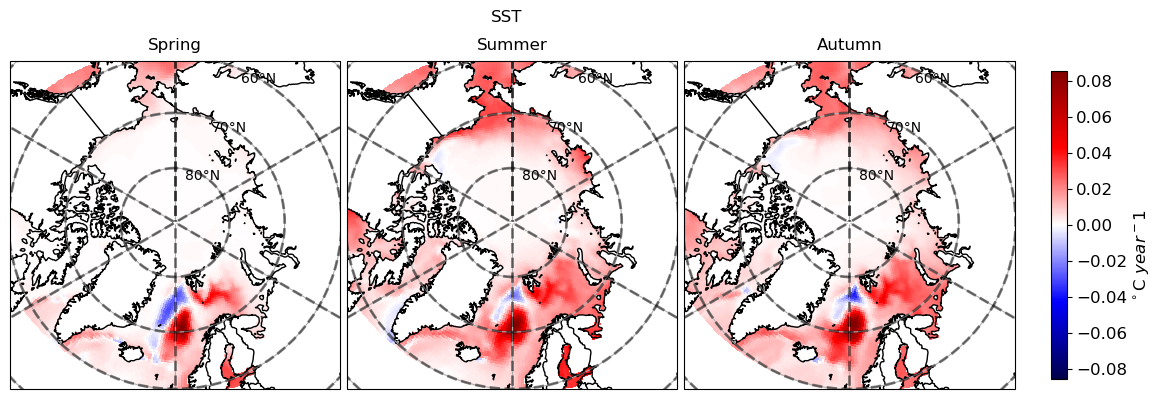

In [38]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']

for i in range (len(axs.flat)):
    cs=dsst[i].tos_polyfit_coefficients[0].plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label(' $^\circ$C $year^-1$',horizontalalignment='right',fontsize=12,y=0.55)
fig.suptitle('SST',y=0.71,x=0.48)

##### Figure 8. Trends in SST for different seasons

Text(0.48, 0.71, 'Sea Ice Trends')

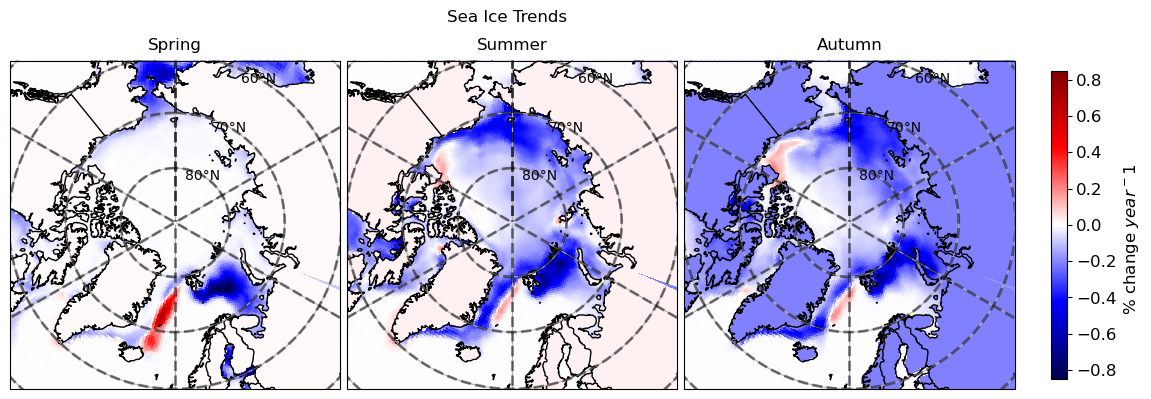

In [39]:
fig, axs = plt.subplots(1, 3,figsize=(14, 10),subplot_kw={'projection': ccrs.NorthPolarStereo()})

titles=['Spring','Summer','Autumn']
seasons=['MAM','JJA','SON']

for i in range (len(axs.flat)):
    cs=dice[i].siconc_polyfit_coefficients[0].plot(ax=axs.flat[i],x='longitude',y='latitude'
                                 ,transform=ccrs.PlateCarree(), cmap='seismic',add_colorbar=False)
    
    axs.flat[i].set_extent([0, 360, 60, 90], crs=ccrs.PlateCarree())
    axs.flat[i].add_feature(cfeature.BORDERS)
    axs.flat[i].add_feature(cfeature.COASTLINE)
    axs.flat[i].gridlines()
    axs.flat[i].set_title(titles[i],pad=8,fontsize=12)
    gl = axs.flat[i].gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                               linewidth=2, color='k', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.xlabels_bottom= False


# Adjust the location of the subplots on the page to make room for the colorbar
fig.subplots_adjust(wspace=0.02,right=1)
cbar=plt.colorbar(cs, ax=axs, shrink=0.4, location='right',pad=0.03)
cbar.ax.tick_params(labelsize=12)

cbar.set_label('% change $year^-1$',horizontalalignment='right',fontsize=12,y=0.7)
fig.suptitle('Sea Ice Trends',y=0.71,x=0.48)

##### Figure 9. Trends in Sea Ice concentration for different seasons

## 4.4 Monthly anomaly in different basins of the Arctic

In [20]:
##................................Coordinates of different basins (defined in Arrigo et al. 2011)..............................##
region_chuchuki=[65,90,360-180,360-160]
region_barent=[65,90,15,55]
region_beaufort=[65,90,360-160,360-100]
region_baffin=[65,90,360-100,360-45]
region_greenland=[65,90,360-45,360]
region_laptev=[65,90,105,150]
region_kara=[65,90,55,105]
region_siberian=[65,90,150,180]

In [17]:
var='dmsos'
fileset=md.open_file(model,var='dmsos')
ds = xr.open_mfdataset(fileset, combine='by_coords')

ds_past=ds.sel(time=slice("1950-01-01", "1979-12-31"))     #Reference data
ds_now=ds.sel(time=slice("1980-01-01", "2014-10-31"))      #Recent Years

barent_past=md.monthly_average(ds_past,var,region_barent,model)
barent_now=md.monthly_average(ds_now,var,region_barent,model)

kara_past=md.monthly_average(ds_past,var,region_kara,model)
kara_now=md.monthly_average(ds_now,var,region_kara,model)

beaufort_past=md.monthly_average(ds_past,var,region_beaufort,model)
beaufort_now=md.monthly_average(ds_now,var,region_beaufort,model)

baffin_past=md.monthly_average(ds_past,var,region_baffin,model)
baffin_now=md.monthly_average(ds_now,var,region_baffin,model)

greenland_past=md.monthly_average(ds_past,var,region_greenland,model)
greenland_now=md.monthly_average(ds_now,var,region_greenland,model)

laptev_past=md.monthly_average(ds_past,var,region_laptev,model)
laptev_now=md.monthly_average(ds_now,var,region_laptev,model)

siberian_past=md.monthly_average(ds_past,var,region_siberian,model)
siberian_now=md.monthly_average(ds_now,var,region_siberian,model)

chuchuki_past=md.monthly_average(ds_past,var,region_chuchuki,model)
chuchuki_now=md.monthly_average(ds_now,var,region_chuchuki,model)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


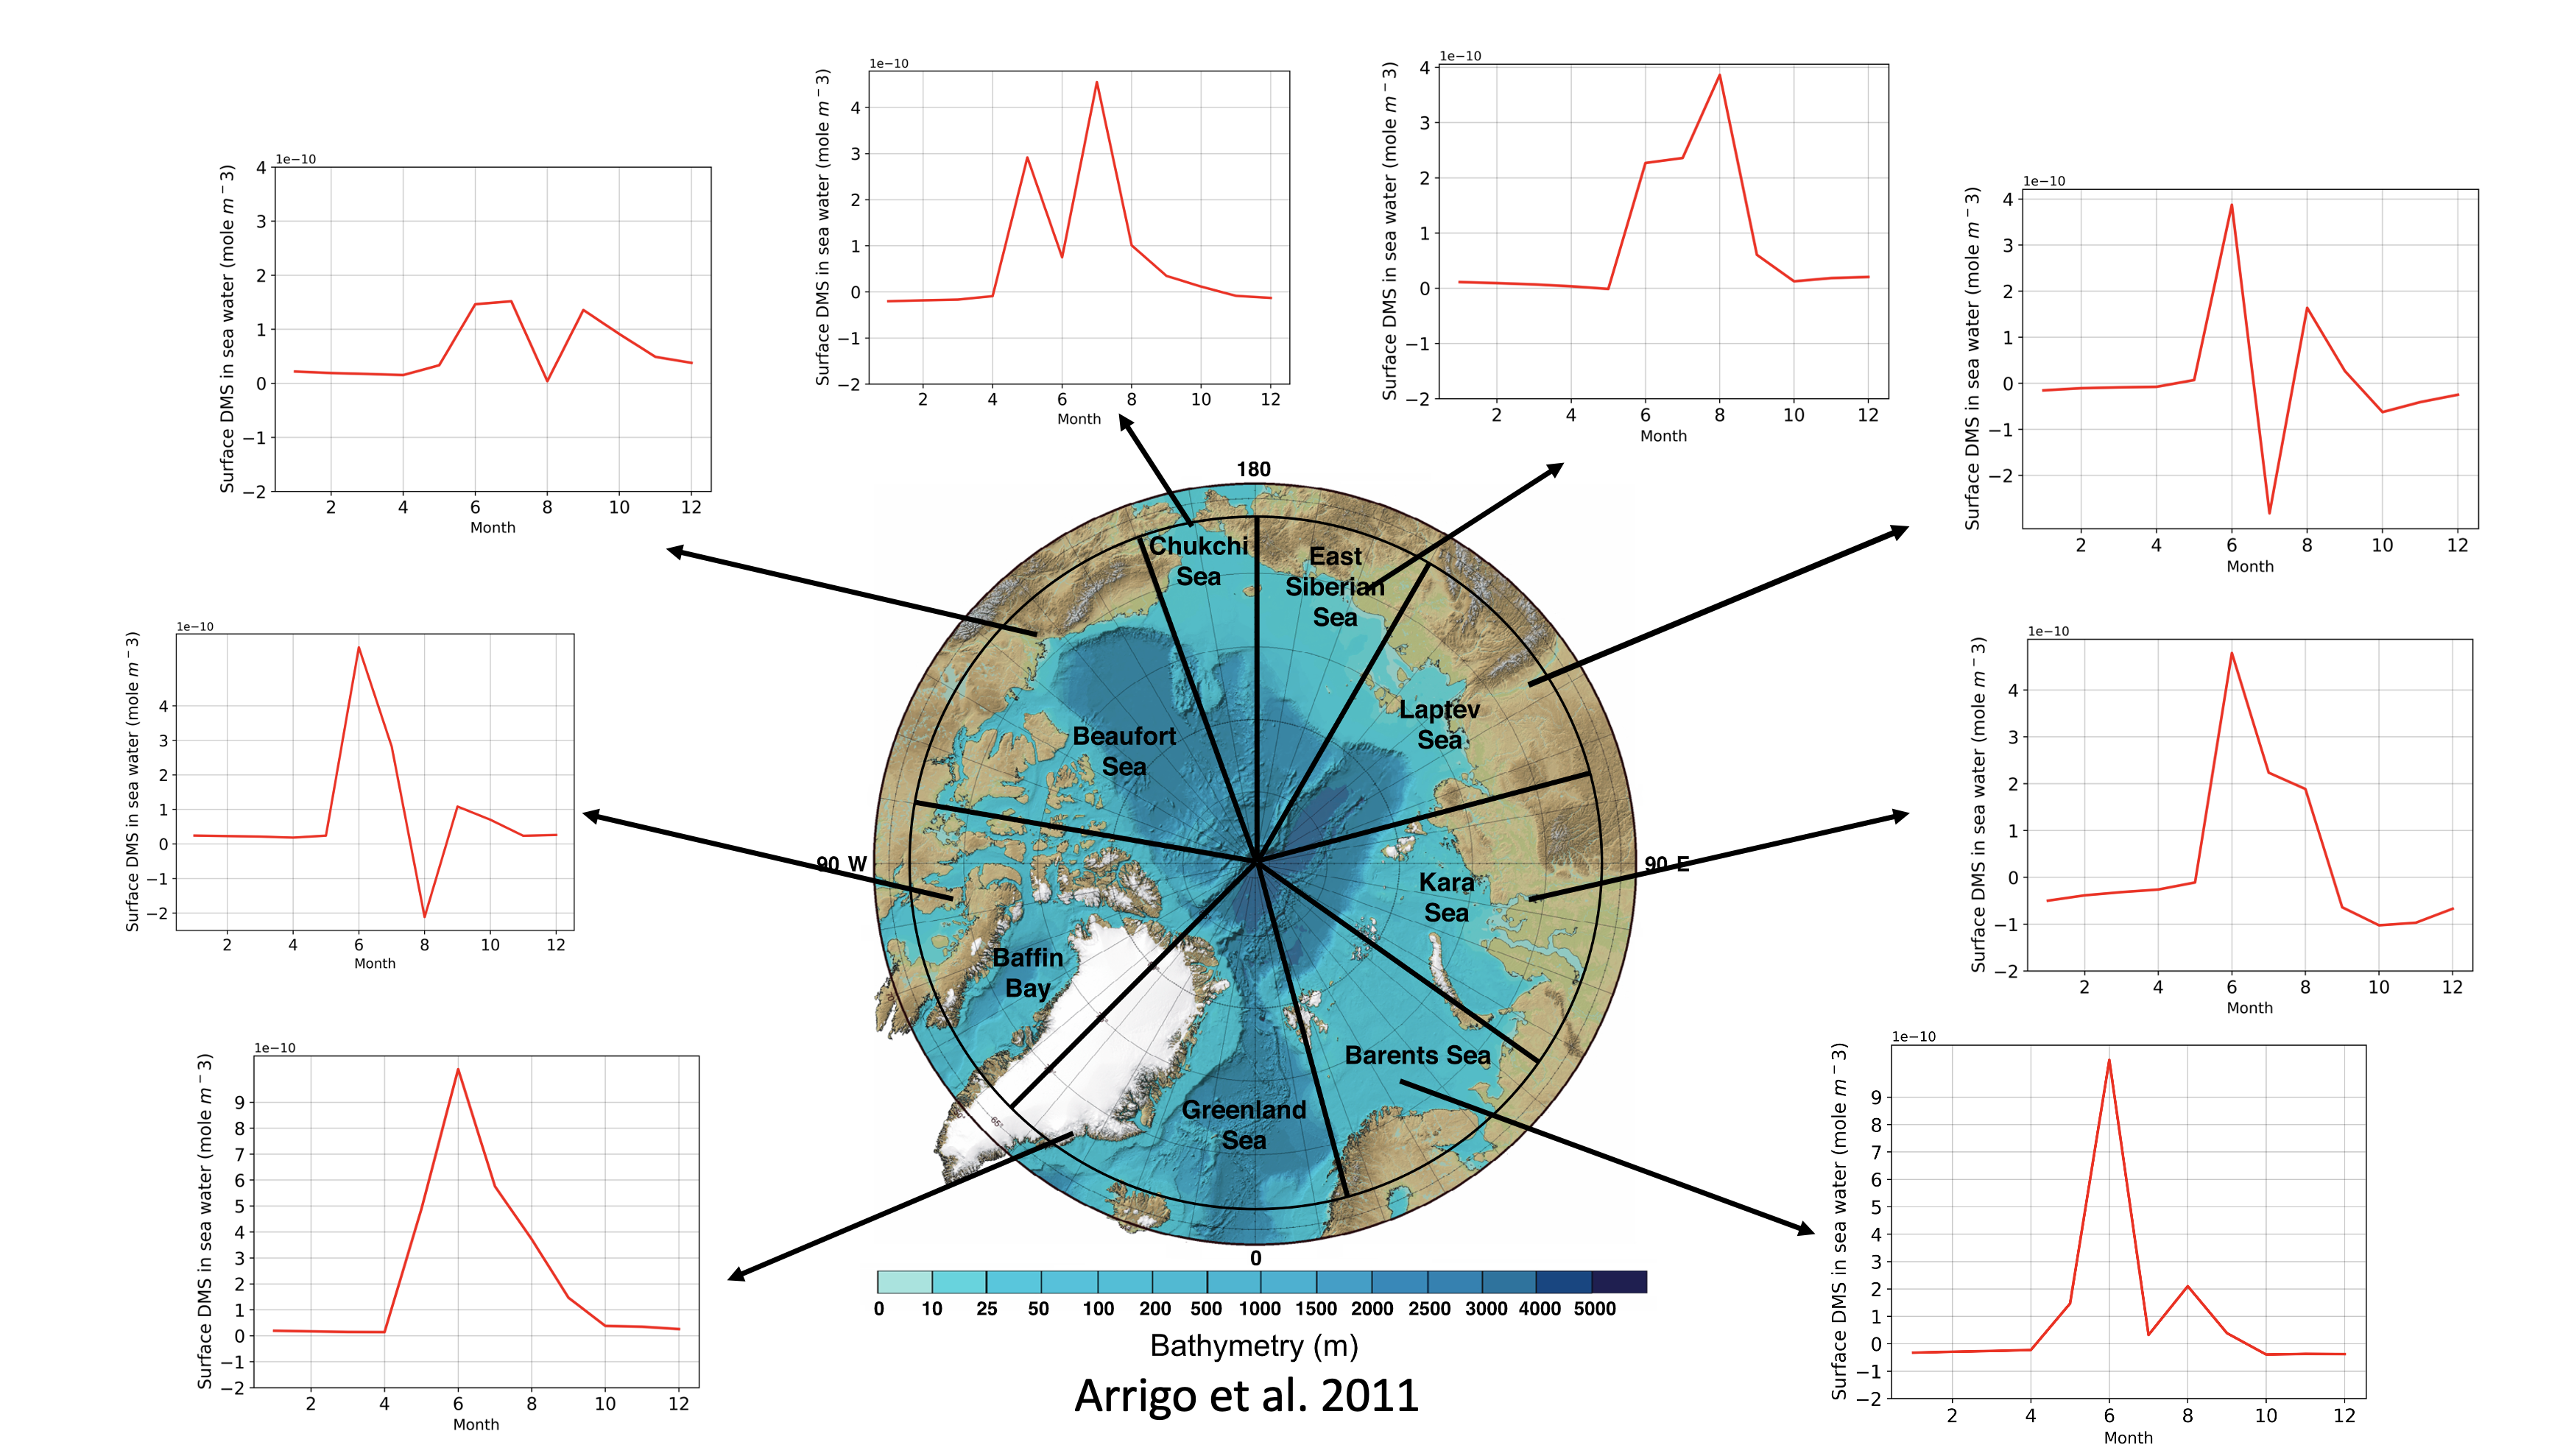

In [21]:
##..................................Calculation of Anomaly for each Basin..............................##
anm_kara=kara_now-kara_past
anm_chuchuki=chuchuki_now-chuchuki_past
anm_beaufort=beaufort_now-beaufort_past
anm_baffin=baffin_now-baffin_past
anm_greenland=greenland_now-greenland_past
anm_laptev=laptev_now-laptev_past
anm_siberian=siberian_now-siberian_past
anm_barent=barent_now-barent_past

from IPython.display import Image
Image(filename='plots/arctic_sea.png')

 ##### Figure 10. Monthly anomaly of DMS concentration in 8 basins of the Arctic. The coordinate limits of the basins were taken as per defined in Arrigo et al. 2011

<p style='text-align: justify;'> The figure above shows anomalies in DMS in different regions (defined in Arrigo et al. 2011) of the Arctic. In every region except greenland sea, we can see two peaks in the DMS anomaly. It clearly shows hightened production in spring followed by a period of reduced (negative anomaly) or low production. This can be explained by the fact that the Arctic has historically been a nutrient deficient ocean (Walsh et al. 2005), enhanced activity might be eating up the most of the available nutrients in early spring. Once the nutients are made available again by ocean circulation or riverine discharge, another peak in DMS is observed in the autumn. </p>

# 5. Conclusion

<p style='text-align: justify;'> The arctic has warmed signifcantly in the recent 30 years and it has impacted the sea ice. The rising SST has reduced the area covered by ice which allows more solar insolation to reach the ocean water. Primary production which largely depends on the amount of sunlight has also shown an increase. DMS production is also showing an increase in the Arctic. However, the changes are not evenly distributed. For example, Greenland, Barent and Chuchuki sea have warmed more than the other parts and there is significant reduction in sea ice and rise in DMS production in these regions. Most pronounced changes are happening during summer. But, surprisingly despite an increase in SST and reduction in sea ice in autumn too, there is decreasing trend in the chlorophyll and DMS production in some basins. Moreover, same changes in chlorophyll production in the Greenland sea and the Barent sea doesn't lead to a similar change in the DMS. These findings suggest that trends in DMS can have some dependency on other fators like salinity, global warming induced nutrient transport changes (more nutients discharge in Laptev and Kara sea due to permafrost melting), Therefore, further analysis is required to find the relative importance and role of other parameters in DMS production. Positive trend in DMS in the central Arctic which can be due to a number of factors like undersea transport or enhanced chlorophyll production, has also be investigated further.</p>

# References

Arrigo and van Dijken, 2015. Continued increases in Arctic Ocean primary production Prog. Oceanogr., 136 (2015), pp. 60-70

Isaksen, K., Nordli, Ø., Ivanov, B. et al. Exceptional warming over the Barents area. Sci Rep 12, 9371 (2022). https://doi.org/10.1038/s41598-022-13568-5

Muller-Karger, Frank & Varela, Ramón & Thunell, Robert & Luerssen, R. & Hu, C. & Walsh, John. (2005). The important of continental margins in the global carbon cycle. Geophysical Research Letters. 32. 10.1029/2004GL021346.

Rantanen, M., Karpechko, A.Y., Lipponen, A. et al. The Arctic has warmed nearly four times faster than the globe since 1979. Commun Earth Environ 3, 168 (2022). https://doi.org/10.1038/s43247-022-00498-3

Walsh, J.E., Overland, J.E., Groisman, P.Y. et al. Ongoing Climate Change in the Arctic. AMBIO 40 (Suppl 1), 6–16 (2011). https://doi.org/10.1007/s13280-011-0211-z

# Acknowledgent

<p style='text-align: justify;'> The entire course has been a nice learning experience for me. Specially, I got a chance to refine my python coding skills and got more familiar with data analysis and plotting tools. Ada has been an amazing guide and she helped me a lot in learning the coding techniques and ways to reduce time in calculations. She was super quick in providing all types of Data required for the study. I would also like to thank Paul and Michael for giving me an opportunity to participate in the course. </p>